# Relax and Hold Steady - Laplace Equation

## Notes:
* going to step away from time issues and start working on pure space analyses.
* classic example: poisson's equation - $\nabla^{2} u = f$
* use relaxation methods - take a guess at the solution and then run iteratively until you reach the solution - i would imagine you need some tolerance?
    * going to start with the homogenous case of the poisson equation, laplace's equation $\nabla^{2}=0$
* use p to denote that this is using potential theory: $$\frac{\partial^{2}p}{\partial x^{2}}+\frac{\partial^{2}p}{\partial y^{2}}=0$$

* Before we solve out the laplace equation, let's take a look at the math of the poisson equation, with no assumptions. Doing this gives us a fuller picture of the discretization scheme and what assumptions make valid sense and how they impact the full discretized solutions.
    * in order to solve out the poisson equation, we will use $p(x,y)$ to solve out $\nabla^{2} p(x,y) = f(x,y)$, with the only assumption made is that both $p(x,y)$ and $f(x,y)$ exist in the shared domain $\Omega$.
    * therefore, the problem we are solving for first, before any assumptions are made, is: $\frac{\partial^{2}p}{\partial x^{2}}+\frac{\partial^{2}p}{\partial y^{2}}=f(x,y)$
        * we can solve out $\frac{\partial^{2} p}{\partial x^{2}}$ with a central space scheme with $i \implies x$ and $j \implies y$:
        $$\begin{gather}
        p_{i+1,j} = p_{i,j} + \left.\Delta x \frac{\partial p}{\partial x}\right|_{i,j} + \left.\frac{\Delta x^{2}}{2} \frac{\partial^{2} p}{\partial x^{2}}\right|_{i,j} + \left.\frac{\Delta x^{3}}{6} \frac{\partial^{3} p}{\partial x^{3}}\right|_{i,j} + \left.\frac{\Delta x^{4}}{24} \frac{\partial^{4} p}{\partial x^{4}}\right|_{i,j}\tag{1}\\
        p_{i-1,j} = p_{i,j} - \left.\Delta x \frac{\partial p}{\partial x}\right|_{i,j} + \left.\frac{\Delta x^{2}}{2} \frac{\partial^{2} p}{\partial x^{2}}\right|_{i,j} - \left.\frac{\Delta x^{3}}{6} \frac{\partial^{3} p}{\partial x^{3}}\right|_{i,j} + \left.\frac{\Delta x^{4}}{24} \frac{\partial^{4} p}{\partial x^{4}}\right|_{i,j}\tag{2}
        \end{gather}$$ 
        summing Equation (1) and Equation (2) together, we get:
        $$\begin{gather}
        p_{i+1,j} + p_{i-1,j} = 2p_{i,j} + \left.\Delta x^{2} \frac{\partial^{2} p}{\partial x^{2}}\right|_{i,j} + \left.\frac{\Delta x^{4}}{12} \frac{\partial^{4} p}{\partial x^{4}}\right|_{i,j}\tag{3}\\
        \frac{p_{i+1,j} + p_{i-1,j} - 2p_{i,j}}{\Delta x^{2}} = \left.\frac{\partial^{2} p}{\partial x^{2}}\right|_{i,j} + \left.\frac{\Delta x^{2}}{12} \frac{\partial^{4} p}{\partial x^{4}}\right|_{i,j}\tag{4}
        \end{gather}$$
        Allowing $\left.\frac{\Delta x^{2}}{12} \frac{\partial^{4} p}{\partial x^{4}}\right|_{i,j}\equiv O(\Delta x^{2})$, which approximates the order of the error, we can solve out $\frac{\partial^{2} p}{\partial x^{2}}$ into it's final form: 
        $$
        \frac{p_{i+1,j} + p_{i-1,j} - 2p_{i,j}}{\Delta x^{2}} - O(\Delta x^{2}) = \left.\frac{\partial^{2} p}{\partial x^{2}}\right|_{i,j}\tag{5}
        $$
        * Similarly, we can solve out $\frac{\partial^{2} p}{\partial y^{2}}$ with a central space scheme:
        $$\begin{gather}
        p_{i,j+1} = p_{i,j} + \left.\Delta y \frac{\partial p}{\partial y}\right|_{i,j} + \left.\frac{\Delta y^{2}}{2} \frac{\partial^{2} p}{\partial y^{2}}\right|_{i,j} + \left.\frac{\Delta y^{3}}{6} \frac{\partial^{3} p}{\partial y^{3}}\right|_{i,j} + \left.\frac{\Delta y^{4}}{24} \frac{\partial^{4} p}{\partial y^{4}}\right|_{i,j}\tag{6}\\
        p_{i,j-1} = p_{i,j} - \left.\Delta y \frac{\partial p}{\partial y}\right|_{i,j} + \left.\frac{\Delta y^{2}}{2} \frac{\partial^{2} p}{\partial y^{2}}\right|_{i,j} - \left.\frac{\Delta y^{3}}{6} \frac{\partial^{3} p}{\partial y^{3}}\right|_{i,j} + \left.\frac{\Delta y^{4}}{24} \frac{\partial^{4} p}{\partial y^{4}}\right|_{i,j}\tag{7}
        \end{gather}$$ 
        summing Equation (6) and Equation (7) together, we get:
        $$\begin{gather}
        p_{i,j+1} + p_{i,j-1} = 2p_{i,j} + \left.\Delta y^{2} \frac{\partial^{2} p}{\partial y^{2}}\right|_{i,j} + \left.\frac{\Delta y^{4}}{12} \frac{\partial^{4} p}{\partial y^{4}}\right|_{i,j}\tag{8}\\
        \frac{p_{i,j+1} + p_{i,j-1} - 2p_{i,j}}{\Delta y^{2}} = \left.\frac{\partial^{2} p}{\partial y^{2}}\right|_{i,j} + \left.\frac{\Delta y^{2}}{12} \frac{\partial^{4} p}{\partial y^{4}}\right|_{i,j}\tag{9}
        \end{gather}$$
        Allowing $\left.\frac{\Delta y^{2}}{12} \frac{\partial^{4} p}{\partial y^{4}}\right|_{i,j}\equiv O(\Delta y^{2})$, which approximates the order of the error, we can solve out $\frac{\partial^{2} p}{\partial y^{2}}$ into it's final form: 
        $$
        \frac{p_{i,j+1} + p_{i,j-1} - 2p_{i,j}}{\Delta y^{2}} - O(\Delta y^{2}) = \left.\frac{\partial^{2} p}{\partial y^{2}}\right|_{i,j}\tag{10}
        $$

    * From Equation (5) and Equation (10), we can further expand and simplify the poisson equation to:
    $$\begin{gather}
    \frac{p_{i+1,j} + p_{i-1,j} - 2p_{i,j}}{\Delta x^{2}} - O(\Delta x^{2}) + \frac{p_{i,j+1} + p_{i,j-1} - 2p_{i,j}}{\Delta y^{2}} - O(\Delta y^{2}) = f(x,y)\tag{11}\\
    \frac{p_{i+1,j} + p_{i-1,j} - 2p_{i,j}}{\Delta x^{2}} + \frac{p_{i,j+1} + p_{i,j-1} - 2p_{i,j}}{\Delta y^{2}} = f(x,y) + O(\Delta x^{2}) + O(\Delta y^{2})\tag{12}\\
    \Delta x^{2}(p_{i,j+1} + p_{i,j-1} - 2p_{i,j}) + \Delta y^{2}(p_{i+1,j} + p_{i-1,j} - 2p_{i,j}) = \Delta x^{2}\Delta y^{2}[f(x,y) + O(\Delta x^{2}) + O(\Delta y^{2})]\tag{13}\\
    \Delta x^{2}[p_{i,j+1} + p_{i,j-1}] + \Delta y^{2}[p_{i+1,j} + p_{i-1,j}] - 2p_{i,j}[\Delta x^{2}+\Delta y^{2}] = \Delta x^{2}\Delta y^{2}[f(x,y) + O(\Delta x^{2}) + O(\Delta y^{2})]\tag{14}
    \end{gather}$$
    
    * If we allow $\Delta x = \Delta y \equiv \delta$, then Equation 14 becomes: \
    $$\begin{gather}
    \delta^{2}[p_{i,j+1} + p_{i,j-1} + p_{i+1,j} + p_{i-1,j}] - 4p_{i,j}\delta^{2} = \delta^{4}[f(x,y) + 2O(\delta^{2})]\tag{15}\\
    p_{i,j+1} + p_{i,j-1} + p_{i+1,j} + p_{i-1,j} - 4p_{i,j} = \delta^{2}[f(x,y) + 2O(\delta^{2})]\tag{16}
    \end{gather}$$
    
        * the cool thing to note in Equation 16 is that our error compounds twice as fast as it would for any one dimension. The other thing to note is that the error, already of order 2, gets even smaller, and goes to an effective order 4. If we allow $f(x,y)\equiv 0$, we can recover the laplace equation, and also force our discretization to be: 
        $$\begin{gather}
        p_{i,j+1} + p_{i,j-1} + p_{i+1,j} + p_{i-1,j} - 4p_{i,j} = 2\delta^{2}O(\delta^{2})\tag{17}\\
        p_{i,j+1} + p_{i,j-1} + p_{i+1,j} + p_{i-1,j} - 4p_{i,j} = 2O(\delta^{4})\tag{18}
        \end{gather}$$
        Since as we approach our solution, our error (already of order 4) goes to zero; that is, with enough iteration, our solution will approximate the solution well enough that the error won't matter. Taken yet another way, if $n$ is defined as the number iterations, then $$\lim_{n \to\infty}2O(\delta^{4})=0\tag{19}$$ which gives us the final discretization that is found in the notebook: $$p_{i,j+1} + p_{i,j-1} + p_{i+1,j} + p_{i-1,j} - 4p_{i,j} = 0\tag{20}$$

* From Equation 20, we can say that $p_{i,j}$ can be found by knowning the value of it's neighbors (see the 5 point stencil). From that jumping point, we can transform Equation 20 as: $$\frac{1}{4}(p_{i,j+1} + p_{i,j-1} + p_{i+1,j} + p_{i-1,j}) = p_{i,j}\tag{21}$$ and then by allowing the RHS of Equation 21 to be the next iteration, we get a final equation that controls the relaxation method as: $$\frac{1}{4}(p^{k}_{i,j+1} + p^{k}_{i,j-1} + p^{k}_{i+1,j} + p^{k}_{i-1,j}) = p^{k+1}_{i,j}\tag{22}$$

* Note to self: Multiple surface plots don't work well...maybe use subplots?

### Convergence
* In these problems, the boundary conditions drive the problem. Since Neumann is first order, we only have a first order convergence, and our second order scheme doesn't converge

* in order fo roce convergence, we will have to modify Equation 22 a little bit.
    * We've just stated that the boundary condition drives the problem. we will have to do some math to use that to our advantage. Boy these are a lot of equations!
    
## Code: 
all the code will follow this cell. This is to ease runtime and to make sure the scope of all variables remains the same. different iterations of the same code with different values or methods of computing the same solution will be in subsquent cells, while code-notes will be commented like usual.

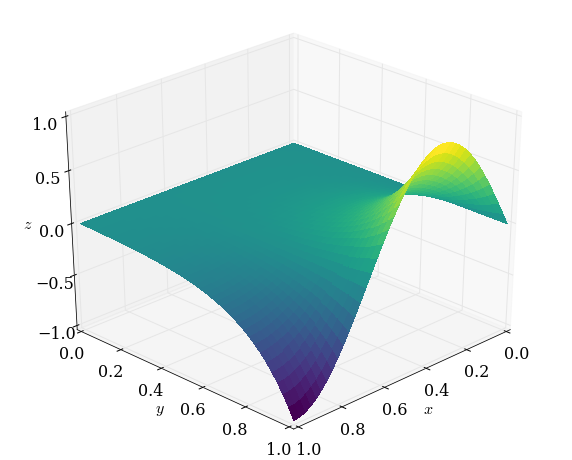

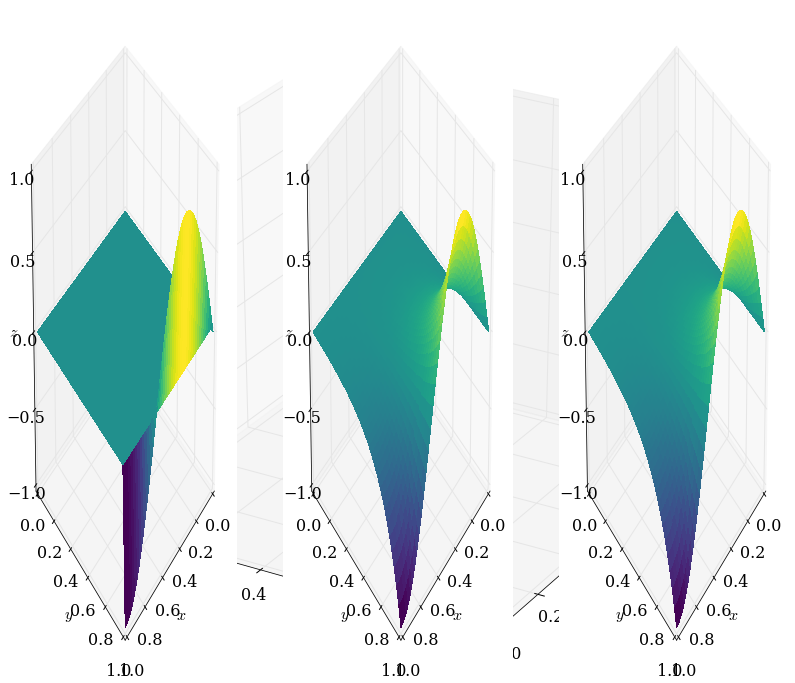

In [4]:
# Standard imports + some extra imports for 3d plots
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Creating the plot3d method
def plot3d(x, y, p):
    fig = pyplot.figure(figsize=(10,8), dpi=1000)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False) # don't need to save this surface

    ax.set_xlim(0,1) # Domain given in problem
    ax.set_ylim(0,1) # Range given in problem
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)
    
# Getting the analytical solution
def analytical(x, y):
    X, Y = numpy.meshgrid(x,y)
    an = numpy.sinh(1.5*numpy.pi*Y / x[-1]) /(numpy.sinh(1.5*numpy.pi*y[-1]/x[-1]))*numpy.sin(1.5*numpy.pi*X/x[-1])
    return an

# Testing both analytical function and plot function
nx = 41
ny = 41
x = numpy.linspace(0,1,nx)
y = numpy.linspace(0,1,ny)
p_analytic = analytical(x,y)
plot3d(x,y,p_analytic)

# Creating overlay function to plot two plots in one graph, overloading the function
def plot3d(x, y, p1, p2):
    fig = pyplot.figure(figsize=(12,10), dpi=1000)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    # First plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,p1[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0,1) # Domain given in problem
    ax.set_ylim(0,1) # Range given in problem
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)
    
    # Second plot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(X,Y,p2[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0,1) # Domain given in problem
    ax.set_ylim(0,1) # Range given in problem
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)

# Create error method for calculations
def err(final, iteration):
    return numpy.sqrt(numpy.sum((final - iteration)**2)/numpy.sum(iteration**2))

# Solve out the relaxation method
def solve(p, y, dx, dy, tolerance):
    error = 1
    pn = numpy.empty_like(p)
    iterations = 0
    while error > tolerance:
        pn = p.copy()
        p[1:-1,1:-1] = .25 * (pn[1:-1,2:] + pn[1:-1, :-2] \
                              + pn[2:, 1:-1] + pn[:-2, 1:-1])
        
        ##Neumann B.C. along x = L
        p[1:-1, -1] = p[1:-1, -2]
        error = err(p, pn)
     
    return p

# Overloading plot3d for 3 functions
def plot3d(x, y, p1, p2, p3):
    fig = pyplot.figure(figsize=(14,12), dpi=1000)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    # First plot
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.plot_surface(X,Y,p1[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0,1) # Domain given in problem
    ax.set_ylim(0,1) # Range given in problem
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)
    
    # Second plot
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.plot_surface(X,Y,p2[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0,1) # Domain given in problem
    ax.set_ylim(0,1) # Range given in problem
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)
    
    # Second plot
    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.plot_surface(X,Y,p3[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0,1) # Domain given in problem
    ax.set_ylim(0,1) # Range given in problem
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)
    
# setting up initial guess and using to compare
dx = 1/(nx-1)
dy = 1/(ny-1)

# initialize the first guess
p_init = numpy.zeros((ny,nx)) ##create a XxY vector of 0's

# Dirichlet boundary conditions
p_init[-1,:] = numpy.sin(1.5*numpy.pi*x/x[-1])

#Plotting intial guess, final iteration, and analytic function, in that order
p_iterate = solve(p_init.copy(), y, dx, dy,1e-8)
plot3d(x,y,p_init,p_iterate,p_analytic)

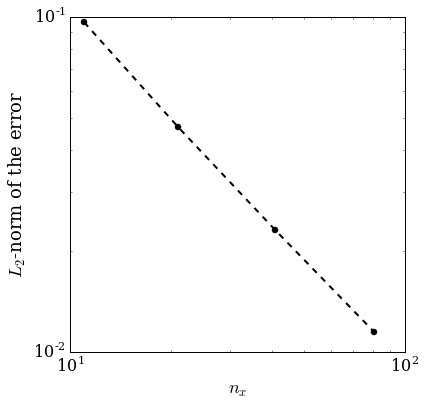

In [6]:
## Convergence understanding!

def laplace_IG(nx):
    '''Generates initial conditions for Laplace 2D problem for a 
    given number of grid points (nx) within the domain [0,1]x[0,1]
    
    Parameters:
    ----------
    nx: int
        number of grid points in x (and implicitly y) direction
        
    Returns:
    -------
    p: 2D array of float
        Pressure distribution after relaxation
    x: array of float
        linspace coordinates in x
    y: array of float
        linspace coordinates in y
    dx: float
        grid spacing in x
    dy: float
        grid spacing in y
    '''
    dx = 1/(nx-1)

    ##initial conditions
    p = numpy.zeros((nx,nx)) ##create a XxY vector of 0's

    ##plotting aids
    x = numpy.linspace(0,1,nx)
    y = x
    dy = dx

    ##Dirichlet boundary conditions
    p[:,0] = 0
    p[0,:] = 0
    p[-1,:] = numpy.sin(1.5*numpy.pi*x/x[-1])
    
    return p, x, y, dx, dy

nx_values = [11, 21, 41, 81]
l2_target = 1e-8

error = numpy.empty_like(nx_values, dtype=numpy.float)


for i, nx in enumerate(nx_values):
    p, x, y, dx, dy = laplace_IG(nx)
    
    p = solve(p.copy(), y, dx, dy, l2_target)
    
    p_an = analytical(x, y)
    
    error[i] = err(p, p_an)

pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)

pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o')
pyplot.axis('equal');